In [1]:
import json
import os
import sys
import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Locate results

In [3]:
results_dir = 'results/race_results.json'
with open(results_dir, 'r') as input_file:
    results_dict = json.load(input_file)

Extract results

In [4]:
models = list(results_dict.keys())
sizes = [results_dict[model]['model_size'] for model in models]
times = [np.diff(results_dict[model]['time']) for model in models]
counts = np.arange(len(times[0]))
speeds = [len(x)/x[-1] for x in [results_dict[model]['time'] for model in models]]

Plot counts

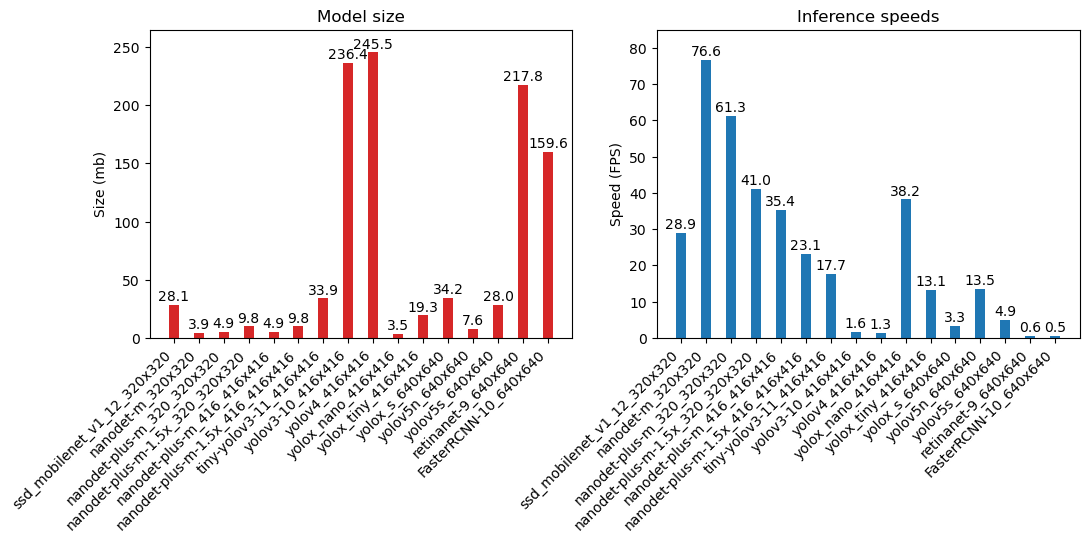

In [5]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=False)
ax=axes.ravel()

bars = ax[0].bar(models, sizes, color = 'tab:red', width = 0.4)
ax[0].bar_label(bars, padding=1, fmt='%.1f')
ax[0].set_title("Model size")
ax[0].set_ylabel("Size (mb)")
ax[0].set_xticklabels(models, rotation=45, ha="right")
ax[0].set_ylim([0,265])

bars = ax[1].bar(models, speeds, color = 'tab:blue', width = 0.4)
ax[1].bar_label(bars, padding=1, fmt='%.1f')
ax[1].set_title("Inference speeds")
ax[1].set_ylabel("Speed (FPS)")
ax[1].set_xticklabels(models, rotation=45, ha="right")
ax[1].set_ylim([0,85])

plt.show()

The results may vary slightly for trained detectors due to region proposal 

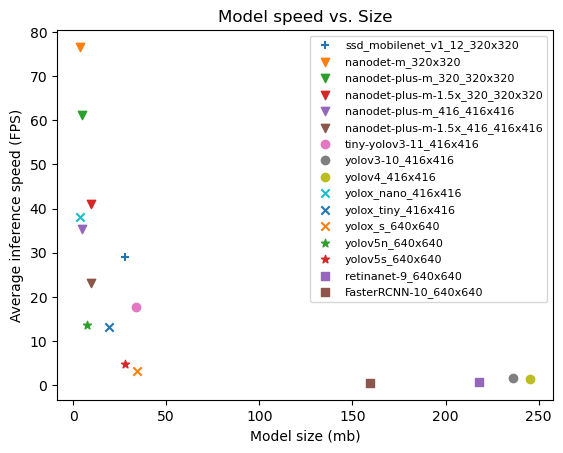

In [6]:
for i, name in enumerate(models):
    if name[:7]=='nanodet':
        plt.scatter(sizes[i], speeds[i], marker = "v")
    elif name[:5]=='yolox':
        plt.scatter(sizes[i], speeds[i], marker = "x")
    elif name[:3]=='ssd':
        plt.scatter(sizes[i], speeds[i], marker = "+")
    elif name[:6]=='yolov5':
        plt.scatter(sizes[i], speeds[i], marker = "*")
    elif name[:6]=='Faster' or name[:6]=='retina':
        plt.scatter(sizes[i], speeds[i], marker = "s")
    else:
        plt.scatter(sizes[i], speeds[i])
plt.xlabel('Model size (mb)')
plt.ylabel('Average inference speed (FPS)')
plt.title('Model speed vs. Size')
plt.legend(models, fontsize="8", loc ="upper right")

Plot speeds characteristics

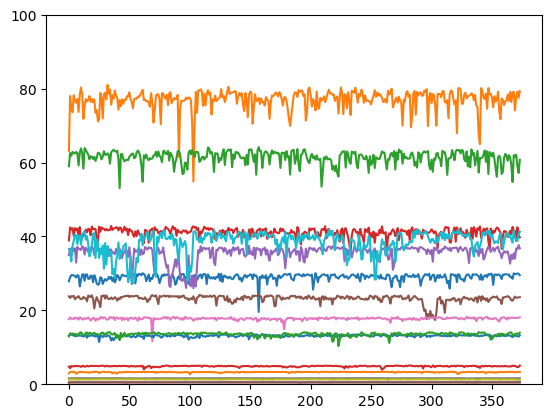

In [7]:
for i, name in enumerate(models):
    plt.plot(counts, 1/times[i])
plt.ylim([0, 100])
plt.show()